In [61]:
### El Análisis de regresión lineal múltiple es una técnica estadística utilizada para estudiar la relación entre
    #variables en una amplia variedad de situaciones y predecir fenómenos diversos. La función de regresión
    #más simple es la lineal, donde cada variable participa de forma aditiva y constante para todo el fenómeno
    #observado (Hernández, Ramírez y Ferri, 2005). La regresión lineal múltiple pone en juego más de dos
    #variables que se exploran, y se cuantifica la relación entre la variable dependiente y las variables
    #independientes. El objetivo final del modelo es minimizar la distancia cuadrática de todos los puntos en relación 
    #a la recta de regresión.
    
    #Para poder crear un modelo de regresión lineal es necesario que se cumpla con los siguientes supuestos:
        # Linealidad: Que la relación entre las variables sea lineal.
        # Independencia: Que los errores en la medición de las variables explicativas sean independientes entre sí.
        # Homocedasticidad: Que los errores tengan varianza constante.
        # Normalidad: Que las variables sigan la Ley Normal.
        # No colinealidad: Que las variables independientes no estén correlacionadas entre ellas.

    
    
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

inpath = "D:/Disco D/Big Data/Data/"
df = pd.read_csv(inpath + "base_datos_2008.csv", nrows = 1e6)

In [81]:
df = df.dropna(subset = ["ArrDelay"])

df1 = df.sample(frac = 0.1) # no usar notacion cientifica
random.seed(567)
 ## DOBLE CORCHETE CREA DATAFRAMES, SINGULAR VECTOR
y = df1[["ArrDelay"]]
x = df1[["DepDelay"]]
x.head(10)

,DepDelay
832543,79.0
226135,-5.0
762706,0.0
236911,14.0
562409,3.0
614619,109.0
467595,74.0
228158,-4.0
235142,-3.0
528461,2.0


In [30]:
 ## de dataframe nx1  a NUMPY ARRAY
X = np.array(x)
X + X

array([[126.],
       [  0.],
       [ 46.],
       [ 26.],
       [210.],
       [  0.],
       [ -6.],
       [ 46.],
       [  2.],
       [ 14.],
       [ 12.],
       [ 38.],
       [-14.],
       [ -4.],
       [  4.],
       [-14.],
       [ -2.],
       [ -4.],
       [ 46.],
       [  4.],
       [ -6.],
       [ 12.],
       [  0.],
       [ 80.],
       [ 64.],
       [ -6.],
       [-12.],
       [-16.],
       [-12.],
       [116.],
       [ -4.],
       [-16.],
       [ -8.],
       [-12.],
       [  8.],
       [ -2.],
       [ 10.],
       [  0.],
       [ -6.],
       [170.],
       [132.],
       [-14.],
       [  0.],
       [-10.],
       [-10.],
       [-12.],
       [ -6.],
       [ -2.],
       [ 32.],
       [ 12.],
       [  2.],
       [ -4.],
       [-14.],
       [  0.],
       [  0.],
       [ -8.],
       [ -8.],
       [ -8.],
       [  2.],
       [-10.],
       [ -8.],
       [-10.],
       [  0.],
       [ 32.],
       [ -6.],
       [  8.],
       [-1

In [22]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [40]:
reg = linear_model.LinearRegression()
reg.fit(x,y)
print("coeficients: ", reg.coef_) #coeficientes

y_pred = reg.predict(x)
print("R squad", r2_score(y, y_pred)) # R cuadrado

coeficients:  [[1.018879]]
R squad 0.8643959161356851


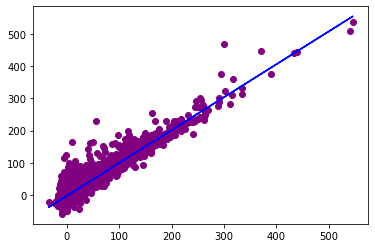

In [50]:
plt.scatter(x[1:10000], y[1:10000], color = "purple") 
plt.plot(x[1:10000], y_pred[1:10000], color = "blue") # Lineaaaa de tendencia

In [75]:
### con mas variables incluyendo categoricas

X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]]
df["Month"] = df["Month"].apply(str) # CONVERTIR A STRING
df["Month"] = str(df["Month"])  ### O esta opcion, tambien valida

df["DayofMonth"] = df["DayofMonth"].apply(str) 
df["DayOfWeek"] = df["DayOfWeek"].apply(str) 

dummies = pd.get_dummies(df[["Month", "DayofMonth", "DayOfWeek", "Origin", "Dest"]])
X = dummies.add(X, fill_value = 0) # Añade nuestras variables num de X en la matriz de dummies

In [76]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=635)

In [78]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
#print("coeficients: ", reg.coef_) #coeficientes

y_pred = reg.predict(X)
print("R squad", r2_score(y, y_pred)) # R cuadrado  # El R cuadrado es muy bajo, con esa informacion 
                                        # no estamos conociendo casi nada de la varianza que queremos explicar

R squad 0.17426057458108057


In [82]:
X = X.add(df[["DepDelay"]], fill_value = 0)
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=636)

In [83]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
#print("coeficients: ", reg.coef_) #coeficientes

y_pred = reg.predict(X)
print("R squad", r2_score(y, y_pred)) # R cuadrado

R squad 0.9710258198481881
